<a href="https://colab.research.google.com/github/arezyhs/Python-Digital-Image-Processing-Projects/blob/main/digital-image-processing-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 23051204335 && 23051204322
# Proses ini terdiri dari beberapa langkah berikut:
# 1. Deteksi Batas Dokumen: Menggunakan YOLOv8 untuk mendeteksi kontur dokumen, yang berfungsi sebagai langkah pertama.
# 2. Penciptaan Grid 2D Topologis: Menggunakan interpolasi polinomial kubik untuk mengoreksi distorsi dan menciptakan grid 2D yang meratakan dokumen.
# 3. Perbaikan Geometri Gambar: Remapping gambar asli berdasarkan grid interpolasi untuk memperoleh bentuk yang lebih mendekati dokumen aslinya.
# 4. Evaluasi OCR dan Pemulihan Geometri, menggunakan metrik OCR:
#       - Levenshtein distance,
#       - Jaro-Winkler similarity,
#       - Character Error Rate (CER)
#       - SSIM, MSE, dan NRMSE untuk mengukur kualitas pemulihan geometri dokumen.

In [2]:
# Instal YOLOv8 dan pustaka terkait
!pip install ultralytics
!pip install opencv-python-headless
!pip install matplotlib
!pip install pytesseract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Saving 4a4d8d70ec74dcdab81c3c9dbd7f39ab-d8a8da858b9026685cea24634180442416937809519441.jpg to 4a4d8d70ec74dcdab81c3c9dbd7f39ab-d8a8da858b9026685cea24634180442416937809519441.jpg

0: 640x640 1 stop sign, 1 donut, 224.0ms
Speed: 9.4ms preprocess, 224.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


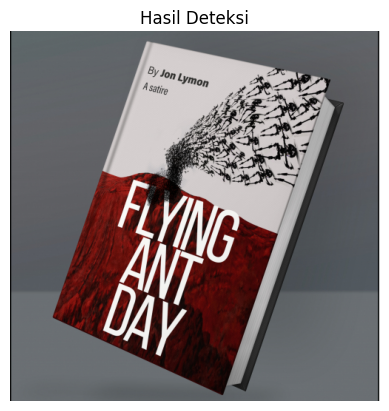

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([11., 54.])
conf: tensor([0.4810, 0.2631])
data: tensor([[5.2064e+01, 1.9035e+02, 3.6400e+02, 4.9293e+02, 4.8098e-01, 1.1000e+01],
        [2.1161e+02, 5.2105e+01, 4.3443e+02, 2.1563e+02, 2.6309e-01, 5.4000e+01]])
id: None
is_track: False
orig_shape: (500, 500)
shape: torch.Size([2, 6])
xywh: tensor([[208.0315, 341.6385, 311.9355, 302.5801],
        [323.0221, 133.8691, 222.8189, 163.5287]])
xywhn: tensor([[0.4161, 0.6833, 0.6239, 0.6052],
        [0.6460, 0.2677, 0.4456, 0.3271]])
xyxy: tensor([[ 52.0638, 190.3484, 363.9993, 492.9285],
        [211.6127,  52.1047, 434.4315, 215.6334]])
xyxyn: tensor([[0.1041, 0.3807, 0.7280, 0.9859],
        [0.4232, 0.1042, 0.8689, 0.4313]])


In [33]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Meminta pengguna untuk mengunggah file
uploaded = files.upload()

# Memuat model YOLOv8
model = YOLO('yolov8n.pt')  # Gantilah dengan model yang sesuai jika diperlukan

# Mendapatkan path file yang diunggah
image_path = list(uploaded.keys())[0]

# Membaca gambar yang diunggah
img = cv2.imread(image_path)

# Deteksi dokumen
results = model(img)

# Menampilkan hasil deteksi dengan plot
results[0].plot()  # Menggunakan plot() pada hasil deteksi pertama

# Jika Anda ingin melihat gambar menggunakan matplotlib:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Hasil Deteksi")
plt.axis('off')
plt.show()

# Untuk melihat data deteksi lebih lanjut:
print(results[0].boxes)  # Menampilkan koordinat dan kelas yang terdeteksi

In [34]:
# Menyaring hasil deteksi dan mendapatkan koordinat batas dokumen
boxes = results[0].boxes  # Mengambil hasil deteksi pada gambar pertama
coordinates = boxes.xywh  # Mengambil koordinat dalam format [x, y, width, height]

# Menampilkan koordinat deteksi
print("Koordinat Batas Dokumen:", coordinates)

Koordinat Batas Dokumen: tensor([[208.0315, 341.6385, 311.9355, 302.5801],
        [323.0221, 133.8691, 222.8189, 163.5287]])


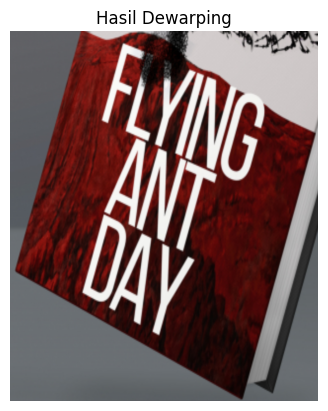

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mengambil koordinat deteksi pertama (asumsi hanya satu deteksi untuk sekarang)
coordinates = boxes.xywh  # [x_center, y_center, width, height]

# Mengubah koordinat dari [x_center, y_center, width, height] ke [xmin, ymin, xmax, ymax]
xmin = coordinates[0][0] - coordinates[0][2] / 2
ymin = coordinates[0][1] - coordinates[0][3] / 2
xmax = coordinates[0][0] + coordinates[0][2] / 2
ymax = coordinates[0][1] + coordinates[0][3] / 2

# Mendapatkan koordinat titik dalam urutan sesuai dengan perspektif (xmin, ymin, xmax, ymax)
pts1 = np.float32([[xmin, ymin], [xmax, ymin], [xmin, ymax], [xmax, ymax]])

# Tentukan ukuran gambar yang diinginkan untuk hasil dewarping
width, height = 1000, 1200
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

# Menghitung matriks transformasi perspektif
matrix = cv2.getPerspectiveTransform(pts1, pts2)

# Menerapkan transformasi perspektif
result_image = cv2.warpPerspective(img, matrix, (width, height))

# Menampilkan gambar yang sudah ter-dewarp
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Hasil Dewarping")
plt.axis('off')
plt.show()

In [36]:
import pytesseract

# Menggunakan OCR untuk mengekstrak teks dari gambar yang telah di-dewarp
text = pytesseract.image_to_string(result_image)

# Menampilkan teks yang diekstrak
print("Teks yang diekstraksi:", text)

Teks yang diekstraksi:  



Saving 23051204332_Yakobus Octavianus Sucahyo Putra_TIJ23 conv 1.png to 23051204332_Yakobus Octavianus Sucahyo Putra_TIJ23 conv 1 (1).png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


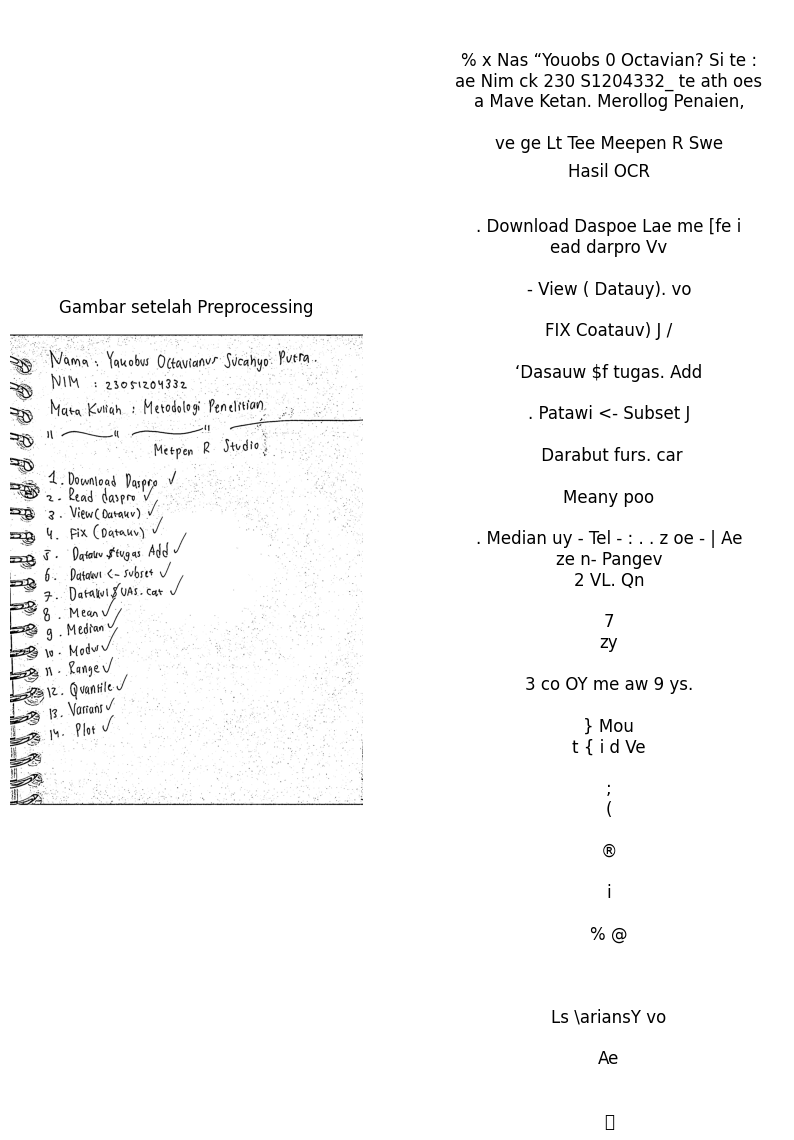

Teks yang berhasil diekstraksi: 
 

% x Nas “Youobs 0 Octavian? Si te :
ae Nim ck 230 S1204332_ te ath oes
a Mave Ketan. Merollog Penaien,

ve ge Lt Tee Meepen R Swe

 

. Download Daspoe Lae me [fe i
ead darpro Vv

- View ( Datauy). vo

FIX Coatauv) J /

‘Dasauw $f tugas. Add

. Patawi <- Subset J

 Darabut furs. car

Meany poo

. Median uy - Tel - : . . z oe - | Ae
ze n- Pangev
2 VL. Qn

7
zy

3 co OY me aw 9 ys.

} Mou
t { i d Ve

;
(

®

i

% @

   

Ls \ariansY vo

Ae

 



In [39]:
# Langkah 1: Instalasi Libraries
!pip install pytesseract opencv-python matplotlib

# Langkah 2: Import Libraries
import cv2
import pytesseract
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Langkah 3: Upload Gambar
uploaded = files.upload()

# Ambil nama file gambar yang diupload
image_path = list(uploaded.keys())[0]

# Langkah 4: Membaca Gambar
img = cv2.imread(image_path)

# Langkah 5: Konversi Gambar ke Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Langkah 6: Noise Reduction (Pengurangan Noise)
# Gunakan GaussianBlur untuk mengurangi noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Langkah 7: Thresholding (Menajamkan Teks)
# Menggunakan adaptive thresholding untuk membedakan teks dari background
threshold = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 2)

# Langkah 8: Menggunakan OCR untuk Ekstraksi Teks
# Gunakan pytesseract untuk ekstraksi teks dari gambar yang telah diproses
text = pytesseract.image_to_string(threshold, lang='eng')

# Menampilkan gambar yang diproses
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
plt.title('Gambar setelah Preprocessing')
plt.axis('off')

# Langkah 9: Menampilkan Teks yang Dikenali
plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, text, fontsize=12, ha='center', va='center')
plt.title('Hasil OCR')
plt.axis('off')

plt.show()

# Menampilkan teks yang diekstrak
print("Teks yang berhasil diekstraksi: ")
print(text)